**2-Step Recursion in base-n**

This code will be used to find the number of distinct bracelets in base-n

In [1]:
#investigating effect of different bases


#function to generate a particular bracelet in base n
def generate_brace_base_n(n,x,y):
  #3 integer parameters in the function
  brace = [x,y]
  #generate the bracelet from initial values x,y and using base n
  looping = True
  while looping == True:
    brace.append((brace[-1]+brace[-2]) % n)
    if brace[0] == brace[-2] and brace[1] == brace[-1]:
      looping = False

  #returns an array with the bracelet formed by the initial values (x,y) in base n
  return brace


#function to generate all bracelets in base n
def generate_all_braces(n):
  #initialise 2d array of all possible bracelets in base n
  list_of_braces = []
  for i in range(n):
    for j in range(n):
      list_of_braces.append([i,j])

  #generation of all possible bracelets from the initial values
  for i in range(n**2):
    list_of_braces[i] = generate_brace_base_n(n,list_of_braces[i][0],list_of_braces[i][1])

  #returns a 2d array of all bracelets in base n from the n^2 possible combinations of initial values
  return list_of_braces


#function to determine how many distinct braces exist for base n
def distinct_braces_n(n):
  list_of_braces = generate_all_braces(n)
  for i in range(n**2):
    list_of_braces[i].append(False)

  counter = 0

  #checking to see which bracelets are non-distinct
  for i in range(n**2):
    if list_of_braces[i][-1] == False:
      counter += 1
      list_of_braces[i][-1] = counter
      for j in range(n**2):
        for k in range((len(list_of_braces[j]))-2):
          if list_of_braces[j][k] == list_of_braces[i][0] and list_of_braces[j][k+1] == list_of_braces[i][1]:
            list_of_braces[j][-1] = counter

  #returns an integer which is the number of distinct bracelets in base n
  return counter

The following code is used to give the number of distinct bracelets in base-n for $1 ≤ n ≤ 128$ and plot the results with a standard plot as well as a log-log plot since bot show interesting results


In [4]:
#initialising an array of x-values (Base Used) to plot
x_array = list(range(1,129))

#calculating and outputing an array of y-values (Number of Distinct Bracelets) to plot
y_array = []
for i in range(len(x_array)):
  y_array.append(distinct_braces_n(x_array[i]))

print(y_array)

[1, 2, 2, 4, 3, 4, 4, 8, 5, 6, 14, 10, 7, 8, 12, 16, 9, 16, 22, 16, 29, 28, 12, 30, 13, 14, 14, 22, 63, 24, 34, 32, 39, 34, 30, 58, 19, 86, 32, 52, 43, 58, 22, 78, 39, 46, 70, 102, 25, 26, 42, 40, 27, 52, 160, 74, 63, 126, 62, 70, 63, 134, 104, 64, 57, 78, 34, 132, 101, 60, 74, 222, 37, 38, 62, 328, 89, 64, 82, 124, 41, 86, 42, 172, 75, 44, 184, 178, 181, 132, 82, 180, 99, 140, 104, 246, 49, 50, 114, 76, 207, 164, 52, 140, 255, 106, 160, 202, 111, 320, 92, 274, 169, 248, 102, 368, 107, 124, 108, 250, 147, 250, 380, 520, 63, 358, 64, 128]


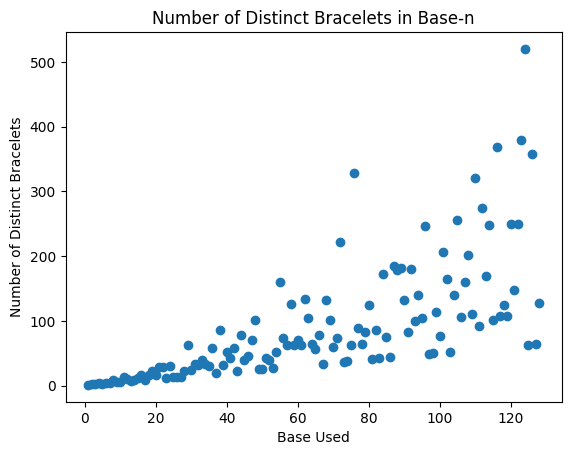

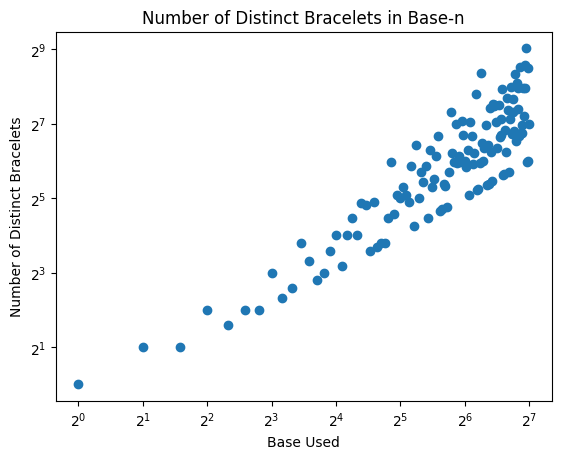

In [13]:
#plotting the data calculated
import matplotlib.pyplot as plt

#plot standard graph
fig, ax = plt.subplots()
ax.scatter(x_array, y_array)
plt.title("Number of Distinct Bracelets in Base-n")
ax.set_xlabel("Base Used")
ax.set_ylabel("Number of Distinct Bracelets")
plt.show()


#plot log-log graph
fig, ax = plt.subplots()

ax.scatter(x_array, y_array)
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
plt.title("Number of Distinct Bracelets in Base-n")
ax.set_xlabel("Base Used")
ax.set_ylabel("Number of Distinct Bracelets")
plt.show()